In [1]:
import pandas as pd

pos_data = pd.read_csv('data/POS_CASH_balance.csv')

count    1.000136e+07
mean    -3.501259e+01
std      2.606657e+01
min     -9.600000e+01
25%     -5.400000e+01
50%     -2.800000e+01
75%     -1.300000e+01
max     -1.000000e+00
Name: MONTHS_BALANCE, dtype: float64
count    9.975287e+06
mean     1.708965e+01
std      1.199506e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      2.400000e+01
max      9.200000e+01
Name: CNT_INSTALMENT, dtype: float64
count    9.975271e+06
mean     1.048384e+01
std      1.110906e+01
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      8.500000e+01
Name: CNT_INSTALMENT_FUTURE, dtype: float64
count    1.000136e+07
mean     1.160693e+01
std      1.327140e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.231000e+03
Name: SK_DPD, dtype: float64
count    1.000136e+07
mean     6.544684e-01
std      3.276249e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000

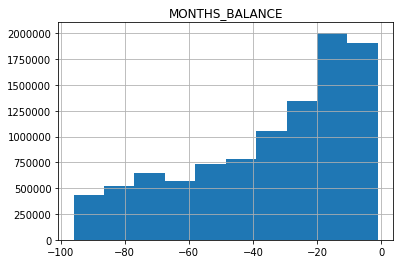

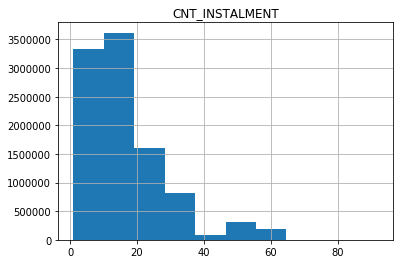

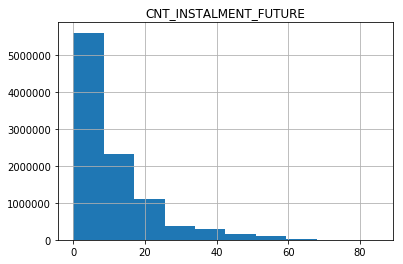

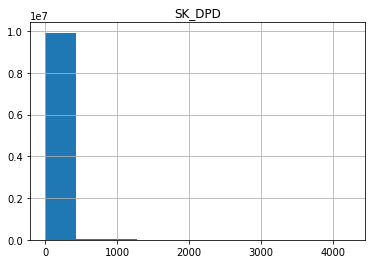

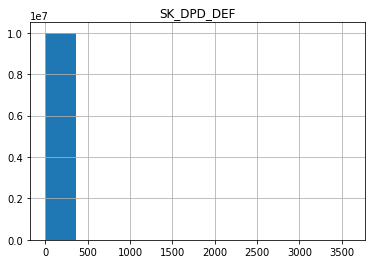

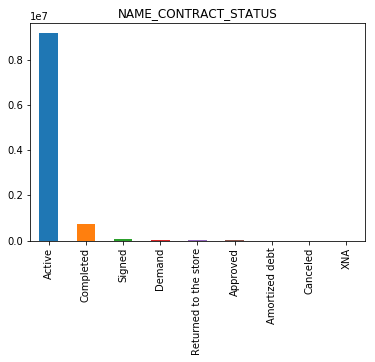

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

num_cols = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
categorical_cols = ['NAME_CONTRACT_STATUS']

for col in num_cols:
    plt.figure()
    print(pos_data[col].describe())
    pos_data[col].hist()
    plt.title(col)
    
for col in categorical_cols:
    plt.figure()
    print(pos_data[col].describe())
    pos_data[col].value_counts().plot(kind='bar')
    plt.title(col)

In [4]:
grouped = pos_data.groupby(by='SK_ID_CURR')
status_summary = grouped.apply(lambda x: x['NAME_CONTRACT_STATUS'].value_counts())

In [5]:
agg_functions = {
    'SK_ID_CURR': 'count',
    'CNT_INSTALMENT': ['mean', 'median'],
    'CNT_INSTALMENT_FUTURE': ['mean', 'median'],
    'SK_DPD': ['mean', 'median'],
    'SK_DPD_DEF': ['mean', 'median']
}

pos_summary = grouped.agg(agg_functions)

In [9]:
flattened_pos_summary = pd.DataFrame()

for col1, col2 in pos_summary.columns:
    flattened_name = col1 + '_' + col2
    flattened_pos_summary[flattened_name] = pos_summary[col1][col2]
    
flattened_pos_summary.to_csv('data/summary/pos_cash_balance_summary.csv')